<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Hierarchical-Classification-of-Variable-Stars/blob/main/Exploratory%20Data%20Analysis%20(EDA)/Variable_Stars_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.Installing Libraries

In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 4.6 MB/s eta 0:00:00


# 1. Libraries

In [ ]:
import os
import patoolib
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from astropy.timeseries import LombScargle

# 2.DataFrame

For this section, you should download data (OGLE3_All_STAR.rar) from this [link](https://drive.google.com/file/d/1E27r0E7hvdeAiulw-JdUIX6dQsRY_ooM/view?usp=share_link) and upload it in Google collaboratory if you want to run it there.

If you want to run it on your computer, you should change 'File_address' and 'Unrar_file_address.' 

In [ ]:
File_address = "/content/OGLE3_All_STAR.rar"
patoolib.extract_archive(File_address)

patool: Extracting /content/OGLE.rar ...
patool: running /usr/bin/unrar x -- /content/OGLE.rar
patool:     with cwd='./Unpack_bhg0o7i2'
patool: ... /content/OGLE.rar extracted to `OGLE.csv'.


'OGLE.csv'

In [ ]:
Unrar_file_address = '/content/OGLE3_All_STAR.csv'
Data = pd.read_csv(Unrar_file_address ,index_col ="ID")
Data = Data.drop(['Unnamed: 0'],axis=1)

In [ ]:
Data # to see what our data looks like

,target,Type,Subtype,RA,Decl,I,V,V_I,P_1,T0_1,A_1,A_2,info
ID,,,,,,,,,,,,,
OGLE-GD-CEP-0001,GD,Cep,1,10:35:57.02,-63:10:19.6,14.236,-99.990,-99.990,1.304696,7000.46515,0.248,-99.990,[[7.78778742e+03 1.42770000e+01 6.00000000e-03...
OGLE-GD-CEP-0002,GD,Cep,F,10:37:17.29,-62:43:22.5,15.005,-99.990,-99.990,1.580926,7000.43213,0.293,-99.990,[[7.78778742e+03 1.48600000e+01 7.00000000e-03...
OGLE-GD-CEP-0003,GD,Cep,F,10:37:59.67,-62:12:21.2,13.420,14.926,1.506,4.632414,7002.34789,0.698,-99.990,[[6.41565190e+03 1.33980000e+01 6.00000000e-03...
OGLE-GD-CEP-0004,GD,Cep,12,10:40:09.98,-62:48:16.1,14.511,-99.990,-99.990,0.911900,7000.59719,0.264,0.048,[[7.78283399e+03 1.44830000e+01 6.00000000e-03...
OGLE-GD-CEP-0005,GD,Cep,1,10:52:33.12,-61:29:05.4,14.666,16.786,2.120,2.416521,7002.32769,0.259,-99.990,[[6.41566132e+03 1.46390000e+01 7.00000000e-03...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
OGLE-BLG-ELL-025401,BLG,ECL,ELL,19:01:57.02,-30:55:12.2,13.526,14.169,0.643,6.921232,7004.30030,0.089,0.083,[[5.62486759e+03 1.35460000e+01 4.00000000e-03...
OGLE-BLG-ELL-025402,BLG,ECL,ELL,19:02:05.95,-30:43:55.5,16.856,17.502,0.646,1.234050,7000.34800,0.116,0.095,[[5.62486759e+03 1.68920000e+01 7.00000000e-03...
OGLE-BLG-ELL-025403,BLG,ECL,ELL,19:03:57.20,-30:57:07.2,13.323,14.601,1.278,56.094750,7039.03870,0.196,0.166,[[5.62486759e+03 1.33250000e+01 4.00000000e-03...


# 3. Function that Gives the Photometry Data of a Chosen Star (Data Extraction)

In [ ]:
def star_photometry(star_name):    
    a = Data.loc[str(star_name),'info'].replace('\n','').replace(' ',',').replace('[','').replace(']','')
    b = a.split(',')
    c = np.array(b)
    c = c.reshape((int(len(b)/3),3))
    c = c.astype(np.float64)
    return c
#instruction : star_photometry("OGLE-GD-CEP-0005")

# Statistical Analysis

**Function that Tests the Correlation of Binary Systems**

In [ ]:
def star_correlation( star_name_1 , star_name_2 ):
  a=star_photometry(star_name_1)
  b=star_photometry(star_name_2)
  c=np.corrcoef(a,b)
  return c
  #instruction: star_correlation('OGLE-BLG-ELL-025403', )
  #Note : Only use this function when your are choosing two binary stars; Otherwise it is not meaningful
  #ECL : Binary Stars

In [ ]:
# Example of two binary stars
star_correlation ('OGLE-BLG-ELL-025403','OGLE-BLG-ELL-025402')

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

 **Function that Plots the Histogram of Some Data**

In [ ]:
def star_hist(aaa , title , xlabel ):  
  fig=plt.figure(figsize=(8,5))
  plt.hist(Data[aaa],  color ='m', histtype ='bar', log = True)
  plt.xlabel(xlabel, fontsize=13)
  plt.ylabel('Number of Stars' , fontsize =13)
  plt.title(title, fontsize=16)
  plt.show()
  fig.savefig('Histogram.png',dpi=300)  #in case you want to save the figure
  #instruction : star_hist("target",'Target', 'Origin')

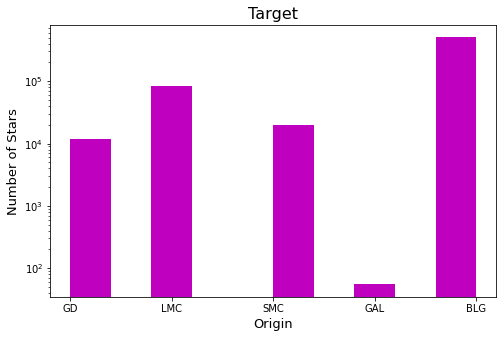

In [ ]:
star_hist("target",'Target', 'Origin')  

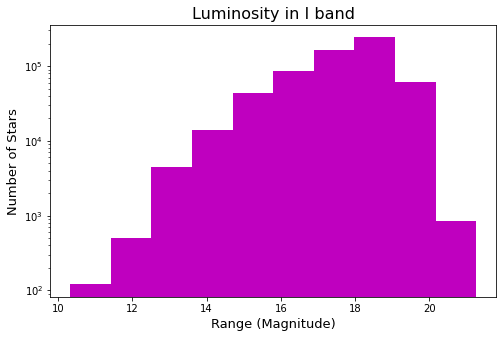

In [ ]:
star_hist("I", 'Luminosity in I band','Range (Magnitude)')
#we will use this band in our further studies

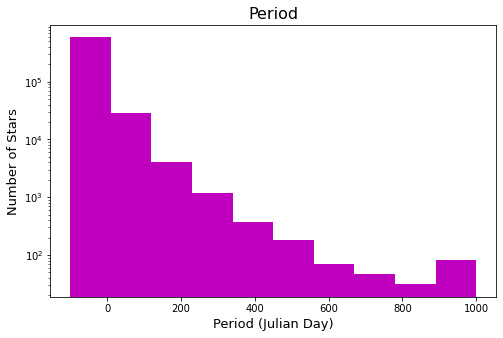

In [ ]:
star_hist("P_1",'Period', 'Period (Julian Day)')

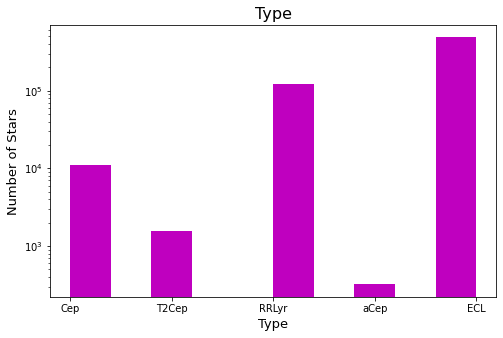

In [ ]:
star_hist("Type",'Type','Type')

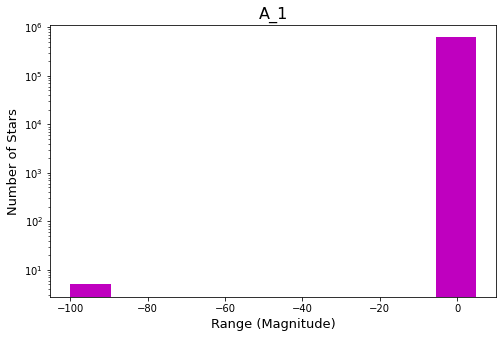

In [ ]:
star_hist("A_1",'A_1','Range (Magnitude)')

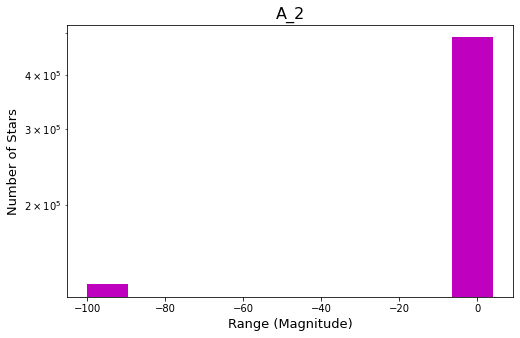

In [ ]:
star_hist("A_2",'A_2','Range (Magnitude)')

**Separating the Classes and Plotting the Magnitude of Each Class**

In [ ]:
counter_Cep=0
counter_aCep=0
counter_T2Cep=0
counter_RRLyr=0
counter_ECL=0
I_Cep=[]
I_aCep=[]
I_T2Cep=[]
I_RRLyr=[]
I_ECL=[]
for i in range(619307) :
  if Data.Type[i] == "Cep":
       counter_Cep += 1
       I_Cep.append(Data.I[i])
  elif Data.Type[i] == "aCep" :
       counter_aCep += 1
       I_aCep.append(Data.I[i])
  elif Data.Type[i] == "T2Cep" :
       counter_T2Cep +=1
       I_T2Cep.append(Data.I[i])
  elif Data.Type[i] == "RRLyr" :
       counter_RRLyr += 1
       I_RRLyr.append(Data.I[i])
  elif Data.Type[i] == "ECL" :
       counter_ECL += 1
       I_ECL.append(Data.I[i])    



print("The 'Cep' class has %d stars." %counter_Cep)
print("The 'aCep' class has %d stars." %counter_aCep)
print("The 'T2Cep' class has %d stars." %counter_T2Cep)
print("The 'RRLyr' class has %d stars." % counter_RRLyr)
print("The 'ECL' class has %d stars." %counter_ECL)
 

The 'Cep' class has 11078 stars.
The 'aCep' class has 321 stars.
The 'T2Cep' class has 1578 stars.
The 'RRLyr' class has 122325 stars.
The 'ECL' class has 484005 stars.


In [ ]:
def class_hist(bbb, title) :
  fig=plt.figure(figsize=(8,5))
  plt.hist(bbb , bins=30 , color='c')
  plt.xlabel('Range (Magnitude)', fontsize=13)
  plt.ylabel('Number of stars', fontsize=13)
  plt.title(title, fontsize=16)
  plt.show
  fig.savefig('Histogram of %s class.png'%title , dpi=300) #in case you want to save the figure
  #instruction : class_hist(A,"A")

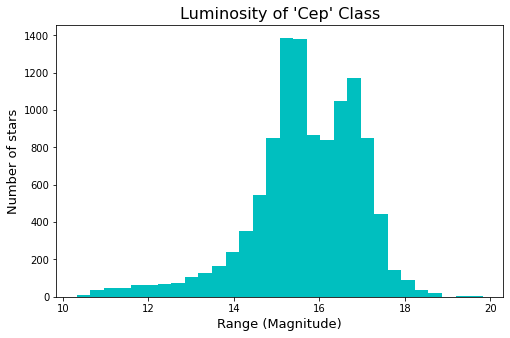

In [ ]:
class_hist(I_Cep,"Luminosity of 'Cep' Class")

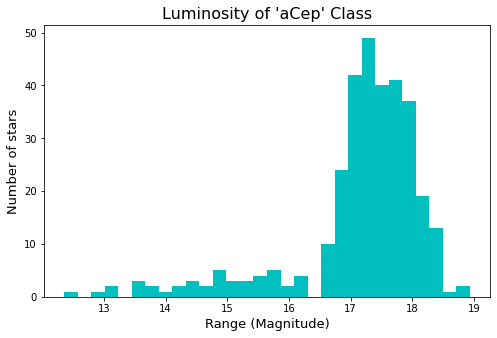

In [ ]:
class_hist(I_aCep,"Luminosity of 'aCep' Class" )

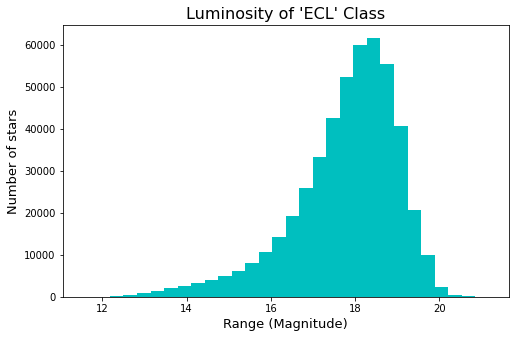

In [ ]:
class_hist(I_ECL, "Luminosity of 'ECL' Class")

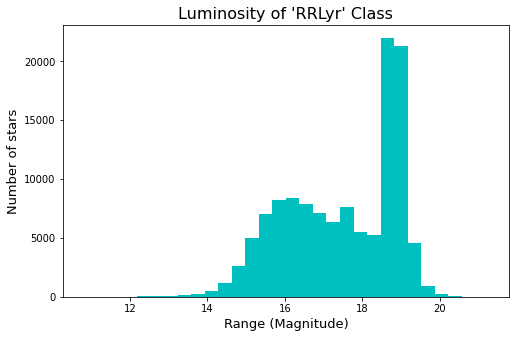

In [ ]:
class_hist(I_RRLyr, "Luminosity of 'RRLyr' Class")

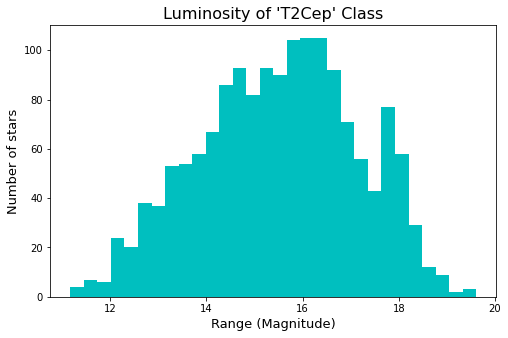

In [ ]:
class_hist(I_T2Cep, "Luminosity of 'T2Cep' Class")

# 7. For Further Usage, We Define a plot_data, period_by_LS and LS_plot Function 

**Plot data function**

In [ ]:
def plot_data(star_name,data_frame,rows=3,columns=3,save=False):   #star_name must be a list [""]
  
  i=0
  j=0
  
  ii=False
  iii=False
  times=[]
  mags=[]
  names=[]
  not_existing=[]

  for i in range(len(star_name)):
    ii=False
    if star_name[i] in data_frame.index:
      ii=True
    if ii==True:
      chosen_star_info=star_photometry(star_name[i])
      chosen_star_info=np.array(chosen_star_info)
      chosen_star_info=chosen_star_info.T
      chosen_star_times=chosen_star_info[0]
      times.append(chosen_star_times)
      chosen_star_mags=chosen_star_info[1]
      mags.append(chosen_star_mags)
      names.append(star_name[i])
    elif ii==False:
      not_existing.append(star_name[i])
    
    if i==len(star_name) and len(names)==0:
      iii=True

  if len(not_existing)!=0:
    print("These stars did not exist in the data:")   
    print(not_existing)

  if iii==False:

    i=0
    j=0
    fig=plt.figure(figsize=(20,10))
    columns=columns
    rows=rows
    ax=[]
 
    for i in range(len(names)):
      ax1=fig.add_subplot(rows, columns, i+1)
      ax.append(ax1)
      plt.scatter(times[i],mags[i],s=5,color="g") 
      ax1.title.set_text(names[i])

    fig.suptitle("Magnitude vs Time (Julian)",size=30)    
    plt.show()
    save=save
    if save==True: 
      fig.savefig('Plot.png',dpi=300)  #in case you want to save the plot

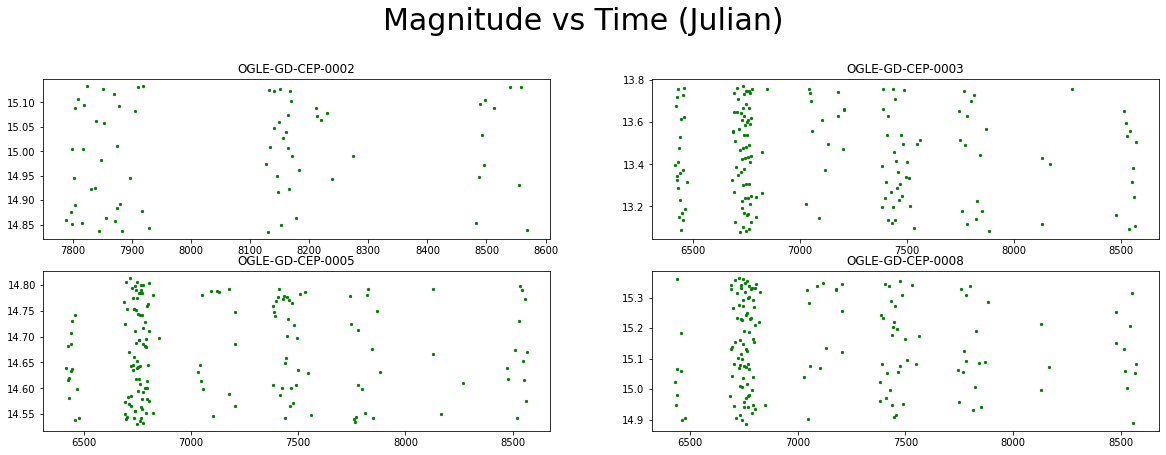

In [ ]:
plot_data(["OGLE-GD-CEP-0002","OGLE-GD-CEP-0003","OGLE-GD-CEP-0005","OGLE-GD-CEP-0008"],Data,3,2)

**Period Finding using Lomb Scargle**

In [ ]:
def period_by_LS(star_name,data_frame,maximum_frequency=24,minimum_frequency=0.002):  #star_name must be a list [""]
  i=0
  
  ii=False
  iii=False
  times=[]
  mags=[]
  names=[]
  not_existing=[]
  stars_period_by_LS=pd.DataFrame(data=None)
  true_period=[]
  
  for i in range(len(star_name)):
    ii=False
    if star_name[i] in data_frame.index:
      ii=True
    if ii==True:
      chosen_star_info=star_photometry(star_name[i])
      chosen_star_info=np.array(chosen_star_info)
      chosen_star_info=chosen_star_info.T
      chosen_star_times=chosen_star_info[0]
      times.append(chosen_star_times)
      chosen_star_mags=chosen_star_info[1]
      mags.append(chosen_star_mags)
      names.append(star_name[i])
      true_period.append(data_frame.loc[star_name[i],'P_1'])

    elif ii==False:
      not_existing.append(star_name[i]) 
    
    if i==len(star_name) and len(names)==0:
      iii=True

  if len(not_existing)!=0:
    print("These stars did not exist in the data:")   
    print(not_existing)  
 
  i=0
  j=0
  frequency=[]
  power=[]
  period=[]
  if iii==False:
    for i in range(len(names)):
      f, p = LombScargle(times[i],mags[i], normalization= 'standard').autopower(minimum_frequency=0.002,maximum_frequency=24) #gives the frequency and the related power for our star's photometry
      frequency.append(f)
      power.append(p)
      maxpower=np.max(p)    #gives the maximum power
      j=np.where(p==maxpower)   #gives the index of the point with maximum power
      star_freq=f[j]      #gives the frequency with maximum power
      star_period=1/star_freq
      period.append(star_period)

    # Now we create a dataframe that gives us the names of the stars and periods
    stars_period_by_LS=pd.DataFrame(data=[names,period,true_period]).T
    stars_period_by_LS.columns=["Star Name","Period (days)","True Period (given byOGLE)"]
  
    
  return stars_period_by_LS

In [ ]:
period_by_LS(["OGLE-GD-CEP-0002","OGLE-GD-CEP-0003","OGLE-GD-CEP-0005","OGLE-GD-CEP-0008"],Data)

,Star Name,Period (days),True Period (given byOGLE)
0,OGLE-GD-CEP-0002,[1.5809899585259046],1.580926
1,OGLE-GD-CEP-0003,[4.632834441382458],4.632414
2,OGLE-GD-CEP-0005,[2.416574590242522],2.416521
3,OGLE-GD-CEP-0008,[9.541914140879298],9.541882


**Fourier Plot Function**


 

In [ ]:
def LS_plot(star_name,data_frame,minimum_frequency=0.002,maximum_frequency=24,rows=3,columns=3,save=False):   #star_name must be a list [""]
  i=0
  
  ii=False
  iii=False
  times=[]
  mags=[]
  names=[]
  not_existing=[]
  stars_period_by_LS=pd.DataFrame(data=None)
  true_period=[]
  
  for i in range(len(star_name)):
    ii=False
    if star_name[i] in data_frame.index:
      ii=True
    if ii==True:
      chosen_star_info=star_photometry(star_name[i])
      chosen_star_info=np.array(chosen_star_info)
      chosen_star_info=chosen_star_info.T
      chosen_star_times=chosen_star_info[0]
      times.append(chosen_star_times)
      chosen_star_mags=chosen_star_info[1]
      mags.append(chosen_star_mags)
      names.append(star_name[i])
      true_period.append(data_frame.loc[star_name[i],'P_1'])
    elif ii==False:
      not_existing.append(star_name[i])
    
    if i==len(star_name) and len(names)==0:
      iii=True
    

  if len(not_existing)!=0:
    print("These stars did not exist in the data:")   
    print(not_existing)    
  
  i=0
  j=0
  frequency=[]
  power=[]
  period=[]
  if iii==False:
    for i in range(len(names)):
      f, p = LombScargle(times[i],mags[i], normalization= 'standard').autopower(minimum_frequency=0.002,maximum_frequency=24) #gives the frequency and the related power for our star's photometry
      frequency.append(f)
      power.append(p)
      maxpower=np.max(p)    #gives the maximum power
      j=np.where(p==maxpower)   #gives the index of the point with maximum power
      star_freq=f[j]      #gives the frequency with maximum power
      star_period=1/star_freq
      period.append(star_period)

    # Now we create a dataframe that gives us the names of the stars and periods
    stars_period_by_LS=pd.DataFrame(data=[names,period,true_period]).T
    stars_period_by_LS.columns=["Star Name","Period (days)","True Period (given by OGLE)"]
  
  if iii==False:

    i=0
    j=0
    fig=plt.figure(figsize=(20,10))
    columns=columns
    rows=rows
    ax=[]
 
    for i in range(len(names)):
      ax1=fig.add_subplot(rows, columns, i+1)
      ax.append(ax1)
      plt.plot(frequency[i],power[i],color="c")
      plt.xlabel('Frequency (1/days)', fontsize=13)
      plt.ylabel('Power', fontsize=13) 
      ax1.title.set_text(names[i])

    fig.suptitle("Frequency vs Power (using LS)",size=30)    
    plt.show()
    save=save
    if save==True: 
      fig.savefig('Plot.png',dpi=300)  #in case you want to save the plot
    
  return stars_period_by_LS

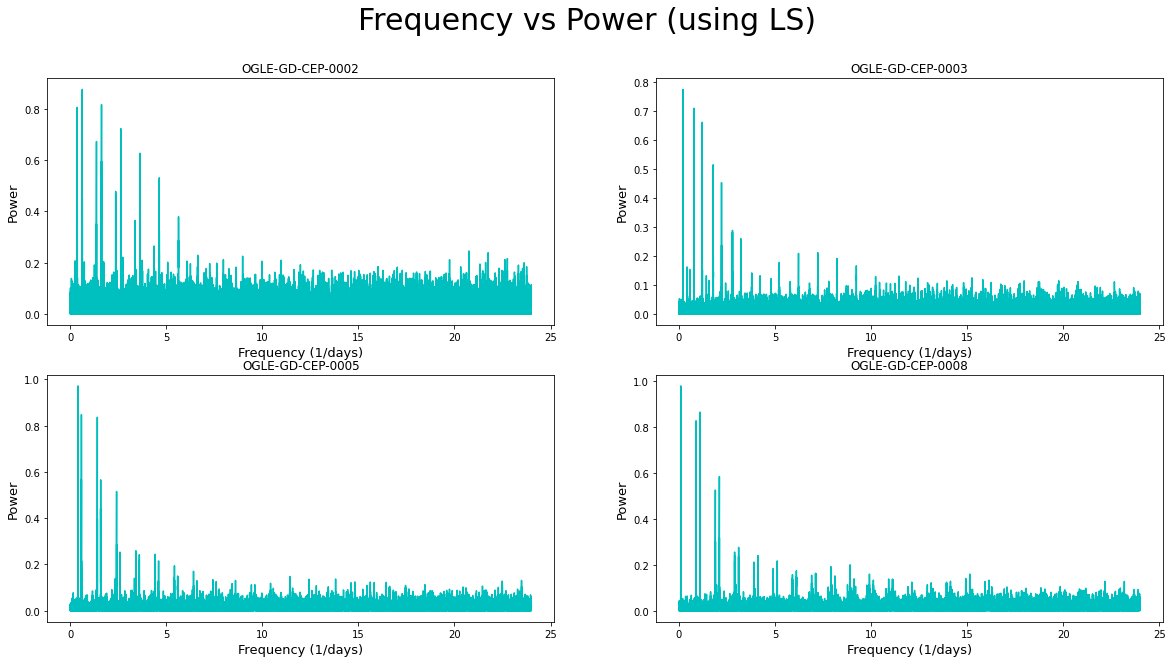

In [ ]:
df=LS_plot(["OGLE-GD-CEP-0002","OGLE-GD-CEP-0003","OGLE-GD-CEP-0005","OGLE-GD-CEP-0008"],Data,0.0002,24,2,2,False)